# Classification and clustering

## Predicting the credit Score

The two csv files (origin: [kaggle](https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification?select=train.csv)) contain the training set (resp the validation set) about the clients from a "global finance company".

Your goal is to use all available information to build a model to accurately predict the probability of default which is coded up as a qualitative variable with three values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder as le                    # label encoder
from sklearn.model_selection import train_test_split                    # train & test split 
from sklearn.neighbors import KNeighborsClassifier as knnClassifier     # knn
from sklearn.linear_model import LogisticRegression as lgrClassifier    # logistic regression

__Import training set and validation sets__

In [17]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

__Describe the dataset. How is the credit category encoded?__

In [18]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [19]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

__Let's re rencode the string variables__

In [5]:
data['Occupation'] = le().fit_transform(data['Occupation'])
data['Type_of_Loan'] = le().fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = le().fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount'] = le().fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = le().fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = le().fit_transform(data['Credit_Score'])

In [6]:
Credit_Score_le = le()

/tmp/ipykernel_221/4218269893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True , cmap = "YlGnBu")


<AxesSubplot: >

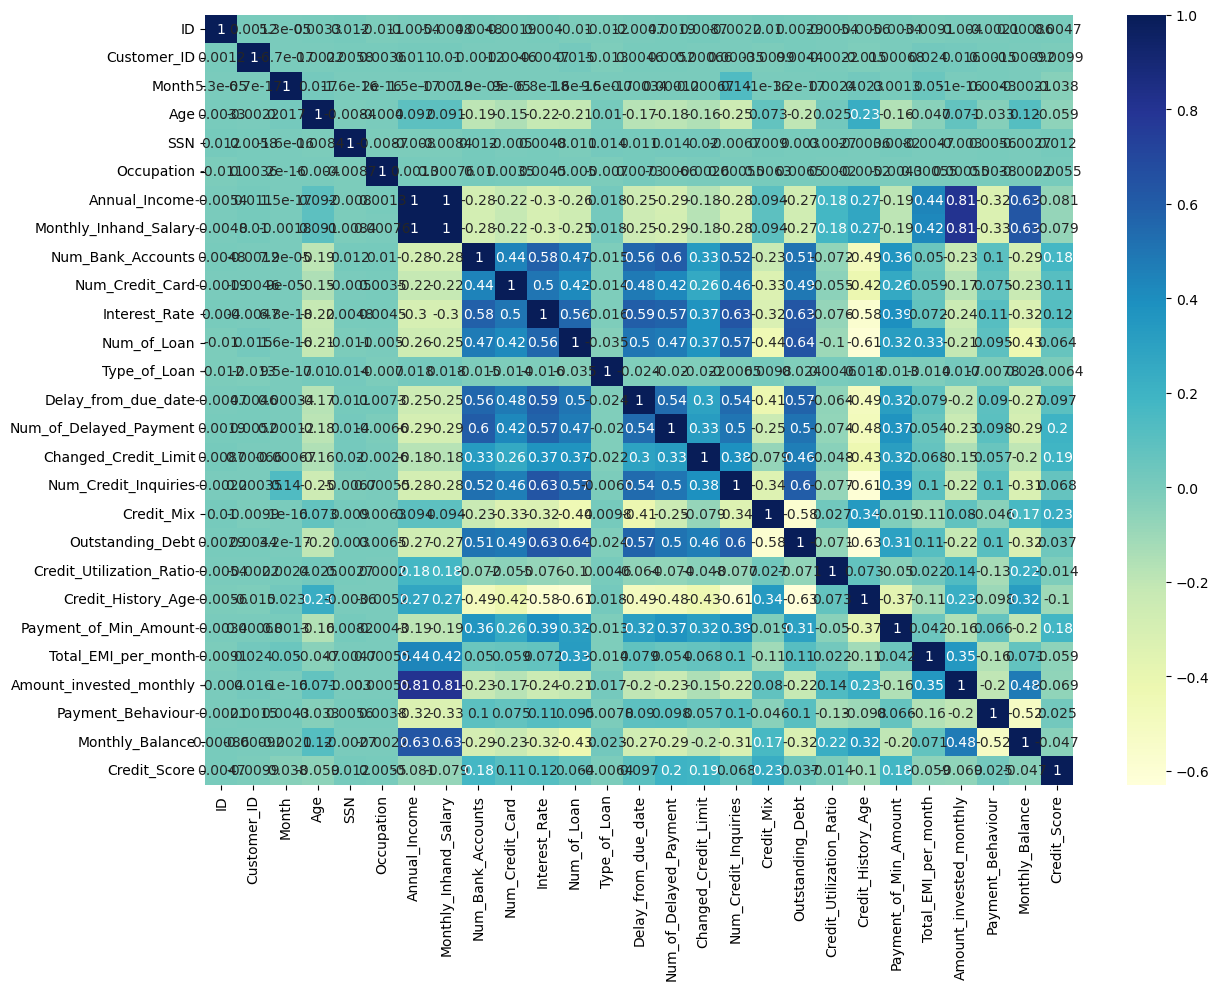

In [7]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr() , annot = True , cmap = "YlGnBu")

In [8]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228,1
99996,155626,37932,5,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610,1
99997,155627,37932,6,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
99998,155628,37932,7,Nicks,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,2


In [9]:
dataset_model = data[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

__Make several plots about the dataset (histograms, correlation plots, ...)___

In [10]:
x = dataset_model.drop(['Credit_Score'] , axis = 1).values
y = dataset_model['Credit_Score' ].values

__Split the train dataset into a `df_train` and a `df_test` dataset.__

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(75000, 14), (75000,)]

__Implement a logistic regression.__

In [12]:
lr = lgrClassifier(C = 100)

In [13]:
lr.fit(x_train , y_train)

/opt/conda/envs/escpython/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [14]:
lr_score_test=lr.score(x_test , y_test)
lr_score_test

0.54208

__Compute the confusion matrix using the test set. Comment__

In [15]:
actual = y_test
predicted = lr.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

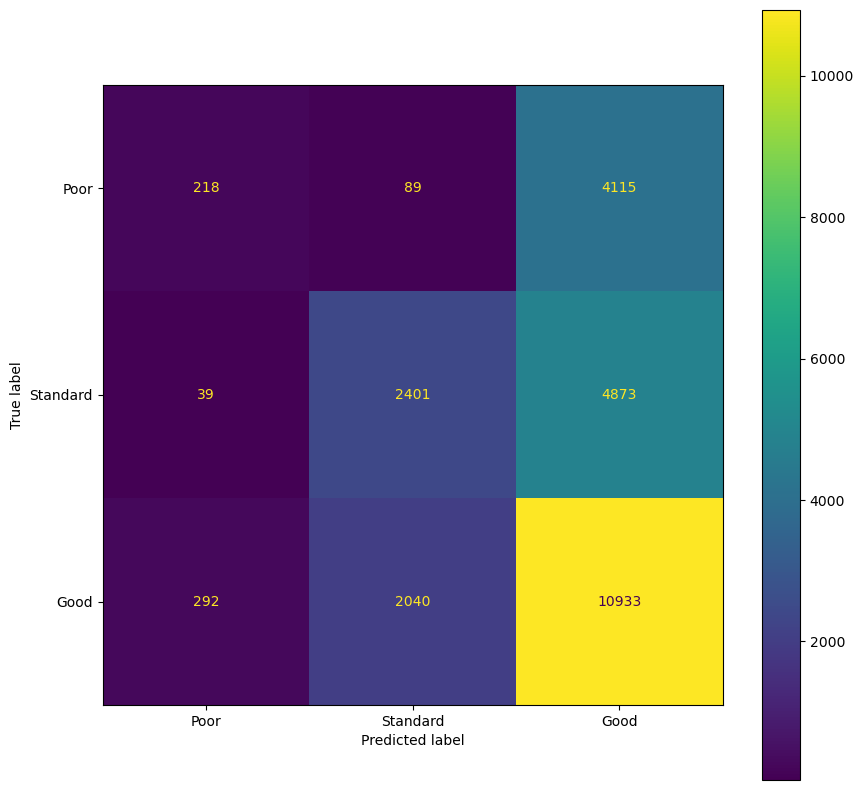

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

__Perform the same analysis with other classification methods and compare their performance using the test set.__

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)

In [33]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test

0.7286666666666667

In [35]:
actual = y_test
predicted = knn.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

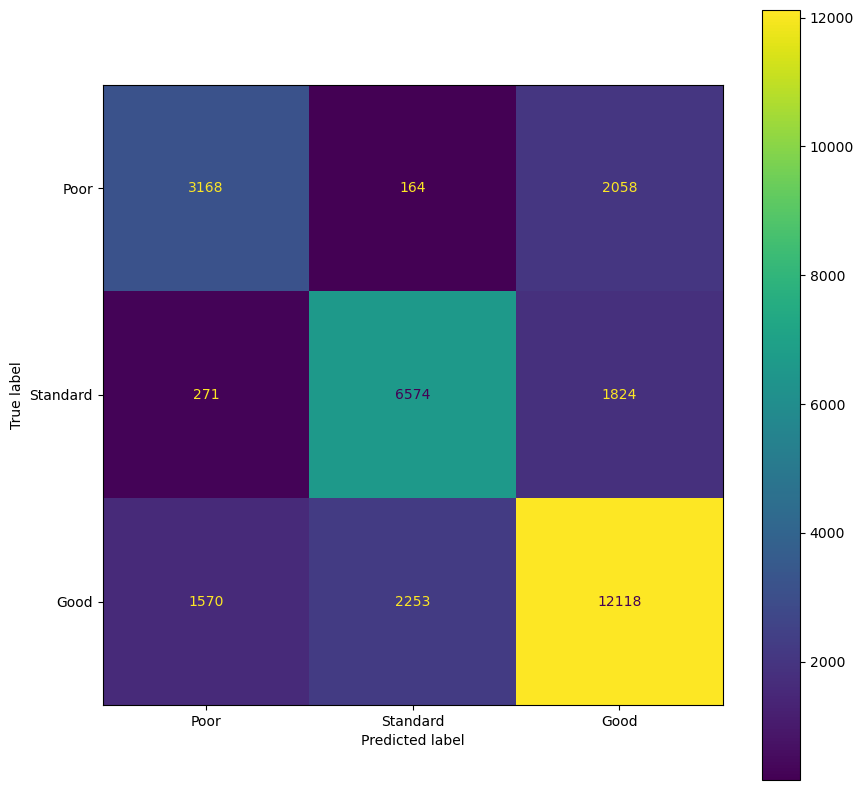

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

__Which one would you choose? Test its performance on the validation set__

## Segmenting the bank clients

__With the same database, without using the credit score, implement a k-means clustering algorithm.__

__Are the clusters related to the credit score?__